In [2]:
import requests
from bs4 import BeautifulSoup as bs

URL = "https://movie.naver.com/movie/running/current.nhn?view=list&tab=normal&order=reserve"
html = requests.get(URL).text
soup = bs(html, 'html.parser')

title = soup.select('dt.tit > a')
star = soup.find_all('span', class_='num')
age = soup.select('dt.tit > span')

title = [line.get_text().strip() for line in title]
star = [line.get_text().strip() for line in star]
age = [line.get_text().strip() for line in age]

star = list(map(float, star))

In [3]:
import pandas as pd

movie={'제목': title[:50], '관람가능 연령': age[:50], '별점': star[0:100:2], '예매율': star[1:100:2]}
df = pd.DataFrame.from_dict(movie, orient='index')
df = df.transpose()
df

,제목,관람가능 연령,별점,예매율
0,조제,15세 관람가,8.74,35.46
1,이웃사촌,12세 관람가,6.13,19.07
2,도굴,12세 관람가,7.5,8.9
3,런,15세 관람가,8.2,5.85
4,스웨그,15세 관람가,10,3.04
5,미드나이트 스카이,12세 관람가,9.67,2.52
6,그날이 온다,15세 관람가,8,2.38
7,파티마의 기적,12세 관람가,9.4,2.09
8,극장판 바이올렛 에버가든,전체 관람가,9.52,1.87
9,잔칫날,12세 관람가,9.38,1.47


In [4]:
df = df.loc[:,:]

In [5]:
df['별점'] = pd.to_numeric(df['별점'])
df['예매율'] = pd.to_numeric(df['예매율'])

all_rank = df.groupby('관람가능 연령')[['별점', '예매율']].mean()
all_rank

,별점,예매율
관람가능 연령,,
12세 관람가,6.206000,4.786667
15세 관람가,5.212105,5.324211
전체 관람가,4.216364,3.523636
청소년 관람불가,5.742000,2.030000


Text(0.5, 0, '관람가능 연령')

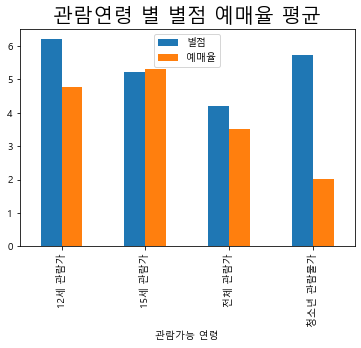

In [6]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

ax = all_rank.plot(kind='bar')

ax.set_title("관람연령 별 별점 예매율 평균", fontsize=20)

ax.set_xlabel("관람가능 연령")

In [7]:
rising_rank = df.sort_values(by=['예매율'], axis=0, ascending = False).head(n=10)
rising_rank

,제목,관람가능 연령,별점,예매율
0,조제,15세 관람가,8.74,35.46
1,이웃사촌,12세 관람가,6.13,19.07
39,킹덤 오브 헤븐: 디렉터스 컷,15세 관람가,0.12,10.00
48,로맨틱 코미디,12세 관람가,0.06,9.48
41,테넷,12세 관람가,0.12,9.41
36,찬실이는 복도 많지,전체 관람가,0.15,9.08
2,도굴,12세 관람가,7.50,8.90
35,오케이 마담,15세 관람가,0.15,8.72
46,남과 여: 여전히 찬란한,15세 관람가,0.06,8.65
38,애비규환,12세 관람가,0.14,8.61


In [8]:
rank_all = df.sort_values(by=['별점'], axis=0, ascending = False).head(n=10)
rank_all

,제목,관람가능 연령,별점,예매율
34,"이별유예, 일주일",15세 관람가,10.00,6.32
4,스웨그,15세 관람가,10.00,3.04
5,미드나이트 스카이,12세 관람가,9.67,2.52
11,가나의 혼인잔치: 언약,전체 관람가,9.58,1.38
8,극장판 바이올렛 에버가든,전체 관람가,9.52,1.87
16,내언니전지현과 나,12세 관람가,9.50,0.63
7,파티마의 기적,12세 관람가,9.40,2.09
9,잔칫날,12세 관람가,9.38,1.47
10,페이트 스테이 나이트 헤븐즈필 III.스프링 송,15세 관람가,9.24,1.41
25,피아니스트의 마지막 인터뷰,전체 관람가,9.20,0.28


In [9]:
data_under12= df.loc[df['관람가능 연령']=='전체 관람가']
rank_under12 = data_under12.sort_values(by=['별점'], axis=0, ascending = False).head()
rank_under12

,제목,관람가능 연령,별점,예매율
11,가나의 혼인잔치: 언약,전체 관람가,9.58,1.38
8,극장판 바이올렛 에버가든,전체 관람가,9.52,1.87
25,피아니스트의 마지막 인터뷰,전체 관람가,9.20,0.28
21,극장판 바다 탐험대 옥토넛 : 대산호초 보호작전,전체 관람가,8.88,0.35
26,산티아고의 흰 지팡이,전체 관람가,8.68,0.26


In [10]:
data_12to14 = df.loc[(df['관람가능 연령']=='전체 관람가')|(df['관람가능 연령']=='12세 관람가')]
rank_12to14 = data_12to14.sort_values(by=['별점'], axis=0, ascending = False).head()
rank_12to14

,제목,관람가능 연령,별점,예매율
5,미드나이트 스카이,12세 관람가,9.67,2.52
11,가나의 혼인잔치: 언약,전체 관람가,9.58,1.38
8,극장판 바이올렛 에버가든,전체 관람가,9.52,1.87
16,내언니전지현과 나,12세 관람가,9.50,0.63
7,파티마의 기적,12세 관람가,9.40,2.09


In [11]:
data_15to19 = df.loc[(df['관람가능 연령']=='전체 관람가')|(df['관람가능 연령']=='12세 관람가')|(df['관람가능 연령']=='15세 관람가')]
rank_15to19 = data_15to19.sort_values(by=['별점'], axis=0, ascending = False).head()
rank_15to19

,제목,관람가능 연령,별점,예매율
34,"이별유예, 일주일",15세 관람가,10.00,6.32
4,스웨그,15세 관람가,10.00,3.04
5,미드나이트 스카이,12세 관람가,9.67,2.52
11,가나의 혼인잔치: 언약,전체 관람가,9.58,1.38
8,극장판 바이올렛 에버가든,전체 관람가,9.52,1.87
